In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [33]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


Q1.

In [34]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [35]:
df1 = df.replace({"연령대코드(5세단위)": age_code})
df1.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,60~64세,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,35~39세,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,35~39세,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,55~59세,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,35~39세,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [36]:
pd.pivot_table(df1, index="연령대코드(5세단위)", values="허리둘레", aggfunc="describe")

,25%,50%,75%,count,max,mean,min,std
연령대코드(5세단위),,,,,,,,
20~24세,67.5,73.4,81.0,23244.0,999.0,75.152220,47.5,12.251781
25~29세,69.0,76.5,84.2,64898.0,999.0,77.704783,48.0,16.735734
30~34세,72.0,80.1,88.0,77517.0,999.0,81.089268,49.0,22.988111
35~39세,75.0,82.0,89.0,84621.0,999.0,82.094012,9.2,14.522095
40~44세,73.0,80.0,87.0,130912.0,999.0,80.488308,42.1,10.803098
45~49세,74.0,81.0,87.0,118357.0,137.0,80.822449,40.0,9.521622
50~54세,75.0,81.0,87.0,129833.0,142.0,81.062754,6.5,9.095438
55~59세,76.0,82.0,87.5,112175.0,139.0,81.799905,32.0,8.730398
60~64세,77.0,83.0,88.0,106491.0,137.0,82.722769,0.0,8.596176


Q2.

In [38]:
columns = ["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]
df_small = df[columns]
df_corr = df_small.corr()
df_corr

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.352014,-0.283296,-0.368630
흡연상태,0.352014,1.000000,-0.125714,-0.588491
연령대코드(5세단위),-0.283296,-0.125714,1.000000,0.080093
성별코드,-0.368630,-0.588491,0.080093,1.000000


<AxesSubplot:>

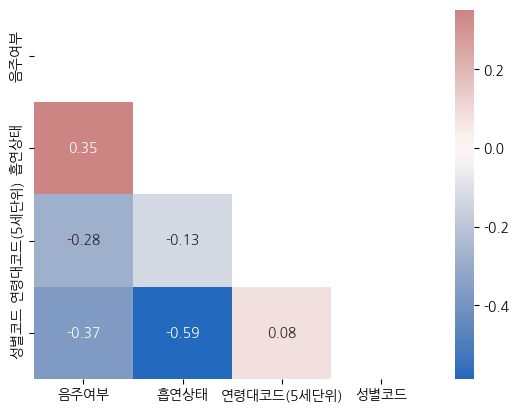

In [53]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="vlag", center=0.0, mask=mask)

Q3.

In [65]:
smoke = {1: "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

df2 = df.replace({"흡연상태": smoke, "음주여부": drink})
df2.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,흡연중,안마심,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,흡연안함,안마심,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,흡연안함,안마심,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,흡연안함,마심,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,흡연중,안마심,0,NaN,NaN,NaN,NaN,NaN,20181126


In [67]:
pd.crosstab(df2['음주여부'], df2['흡연상태'])

흡연상태,끊음,흡연안함,흡연중
음주여부,,,
마심,120779,213743,162166
안마심,55334,394503,52845


<AxesSubplot:xlabel='흡연상태', ylabel='count'>

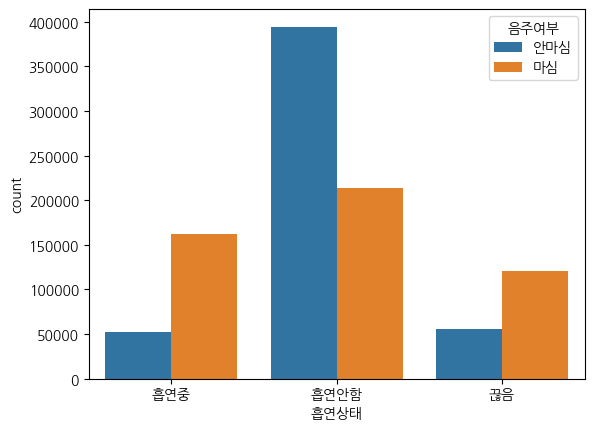

In [68]:
sns.countplot(data=df2, x="흡연상태", hue="음주여부")

Q4.

In [73]:
df3 = df2[df2['체중(5Kg 단위)'] >= 120]
df3.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
1219,2017,1220,2,6,41,170.0,120.0,116.0,0.7,0.9,...,47.0,흡연중,안마심,0,NaN,NaN,NaN,NaN,NaN,20181126
2309,2017,2310,1,6,30,190.0,155.0,127.0,0.8,0.9,...,19.0,흡연중,안마심,1,NaN,NaN,NaN,NaN,1.0,20181126
3497,2017,3498,1,7,46,175.0,120.0,119.0,1.2,1.2,...,111.0,흡연중,마심,0,NaN,NaN,NaN,NaN,NaN,20181126
3685,2017,3686,1,7,30,180.0,140.0,127.0,1.5,1.5,...,58.0,끊음,안마심,1,NaN,NaN,NaN,NaN,0.0,20181126
5788,2017,5789,1,8,41,175.0,140.0,124.0,1.0,1.0,...,35.0,흡연안함,안마심,0,NaN,NaN,NaN,NaN,NaN,20181126


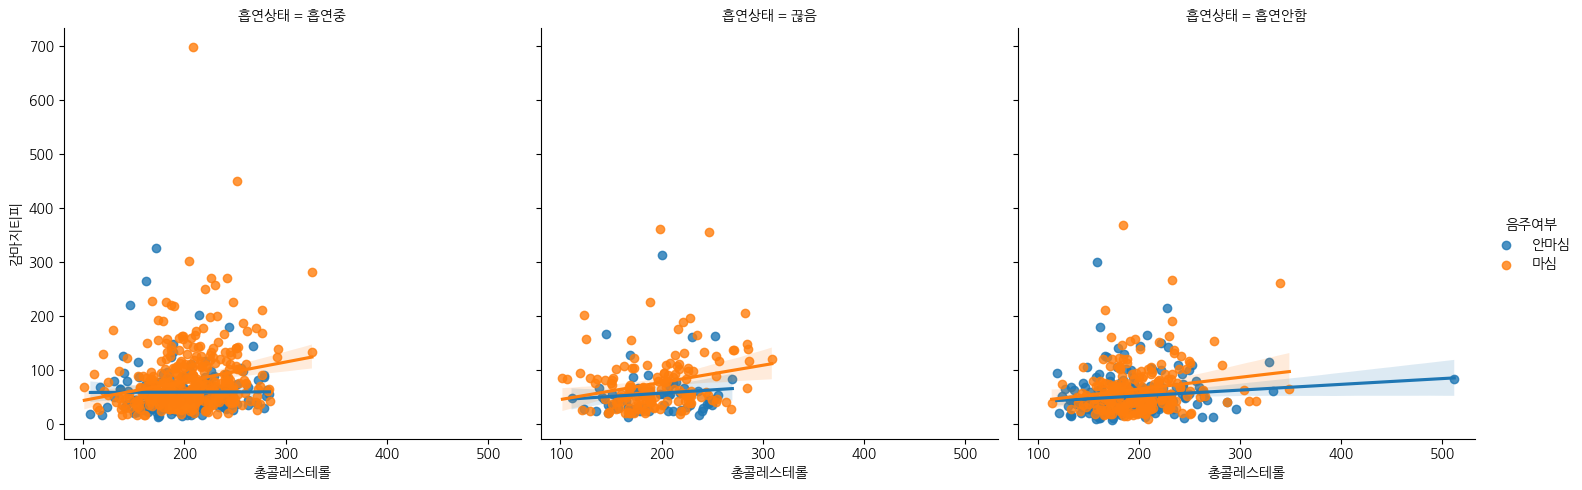

In [74]:
sns.lmplot(data=df3, x="총콜레스테롤", y="감마지티피", hue="음주여부", col="흡연상태")

Q5.

In [91]:
df4 = df.replace({"연령대코드(5세단위)": age_code, "흡연상태": smoke, "음주여부": drink})
df4 = df4.drop(df4[(df4['시력(좌)']== 9.9) | (df4['시력(우)'] == 9.9)].index)
df4 = df4.sort_values("연령대코드(5세단위)")

df4.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
46908,2017,46909,1,20~24세,28,175.0,70.0,79.0,1.0,1.0,...,15.0,흡연중,마심,1,NaN,NaN,NaN,NaN,1.0,20181126
547558,2017,547559,2,20~24세,11,165.0,55.0,66.0,1.2,0.9,...,20.0,흡연안함,마심,1,NaN,NaN,NaN,NaN,0.0,20181126
694235,2017,694236,1,20~24세,44,170.0,55.0,72.0,1.0,1.0,...,17.0,흡연중,안마심,1,NaN,NaN,NaN,NaN,1.0,20181126
139556,2017,139557,2,20~24세,41,165.0,85.0,94.0,0.5,1.0,...,38.0,흡연안함,안마심,0,NaN,NaN,NaN,NaN,NaN,20181126
338729,2017,338730,2,20~24세,28,165.0,70.0,86.4,1.2,0.8,...,11.0,흡연안함,마심,1,NaN,NaN,NaN,NaN,1.0,20181126


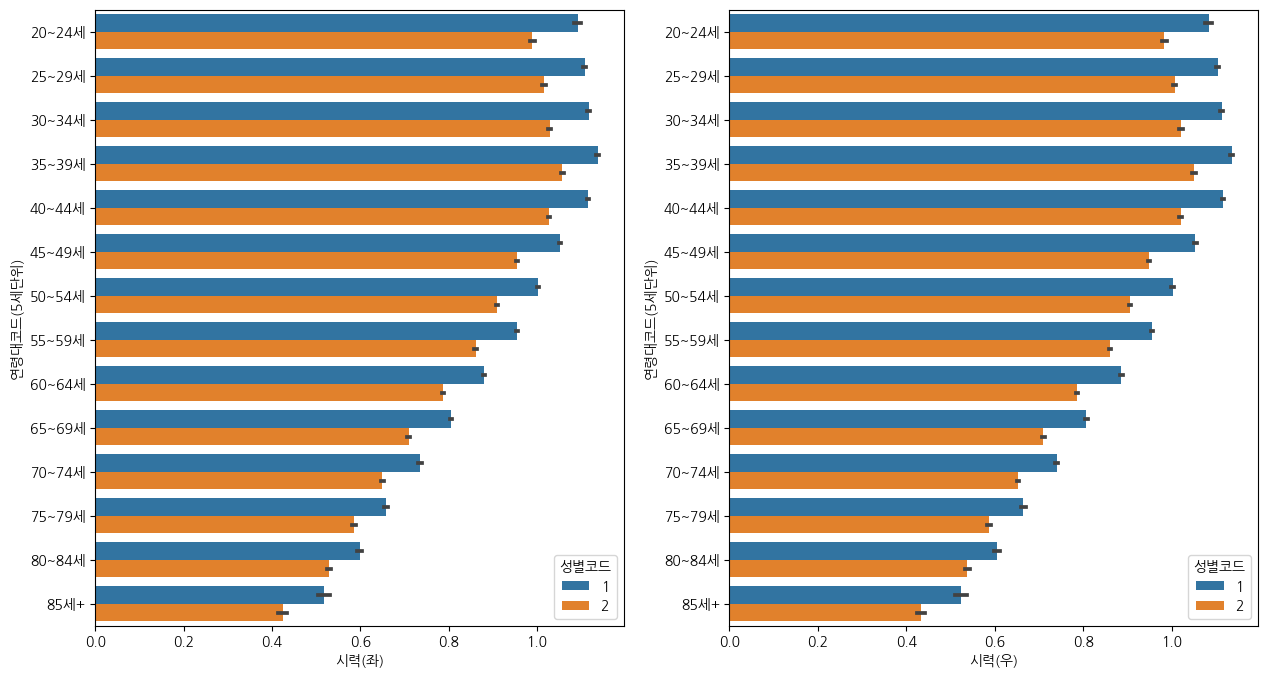

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))

sns.barplot(data=df4, x = '시력(좌)', y = '연령대코드(5세단위)', hue = '성별코드', ax=axes[0])

sns.barplot(data=df4, x = '시력(우)', y = '연령대코드(5세단위)', hue = '성별코드', ax=axes[1])

plt.show()